In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

# I. Lấy dữ liệu từ Website

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = "https://www.cancer.org/cancer/small-cell-lung-cancer/treating/by-stage.html"

In [4]:
req = requests.get(url)

In [5]:
soup=BeautifulSoup(req.content,"html.parser")

In [6]:
KetQuaFind = soup.find('section', class_='main-content').find_all('p')

In [19]:
text1=""
text2=""
i=0
for p in KetQuaFind:
    i=i+1
    if(i>2 and i<8):
        text1 =text1 + p.text
    elif(i>7 and i<14):
        text2 =text2 + p.text
print(text1)
print("")
print(text2)

If you only have one small tumor in your lung and there is no evidence of cancer in lymph nodes or elsewhere, your doctors may recommend surgery to remove the tumor and the nearby lymph nodes.Very few patients with SCLC are treated this way. This is only an option if you are in fairly good health and can withstand having all or part of a lung removed.Before the operation, the lymph nodes in your chest will be checked for cancer spread with mediastinoscopy or other tests, because surgery is unlikely to be a good option if the cancer has spread.Surgery is generally followed by chemotherapy. If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well. The radiation is often given at the same time as the chemo. Although this increases the side effects of treatment, it appears to be more effective than giving one treatment after the other. You might not be given radiation therapy if you already have severe lung disease (in addition to y

# II. Tóm tắt dữ liệu

In [38]:
from gensim.summarization import summarize

In [39]:
text1Summarize = summarize(text1,word_count=40)
print(text1Summarize)

If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well.


In [40]:
text2Summarize = summarize(text2,word_count=40)
print(text2Summarize)

The radiation is usually given in lower doses than what is used if the cancer had already spread to brain, but some patients may still have side effects from the radiation.Most people treated with chemo (with or without radiation) for limited stage SCLC will have their tumors shrink significantly.


# III. Xử lý Data

In [41]:
DataCandidates = pd.read_csv("F:/8_Machine Learning/Bai tap Deeplearning/5_Lung cancer detection/CSVFILES/candidates.csv")
DataAnnotations = pd.read_csv("F:/8_Machine Learning/Bai tap Deeplearning/5_Lung cancer detection/CSVFILES/annotations.csv")

In [42]:
DataCandidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [43]:
DataAnnotations.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [73]:
DataAnnotationsNew =DataAnnotations

In [74]:
DataAnnotationsNew.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


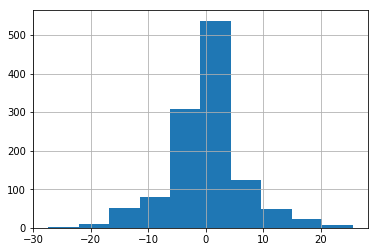

In [53]:
plt.figure()
((DataAnnotations['diameter_mm'])).diff().hist()

In [56]:
import SimpleITK
import SimpleITK as sitk
from PIL import Image
from random import shuffle

In [57]:
from tqdm import tqdm
import pandas as pd
import keras as k
from keras.models import Sequential ,Model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling3D,AveragePooling2D,MaxPooling3D,Conv3D
from keras.layers import Activation, Dropout, Flatten, Dense ,Input
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing import image
from keras import applications

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [58]:
## Sử dụng GPU
import tensorflow as tf
from keras.backend import tensorflow_backend
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

In [59]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    return numpyImage, numpyOrigin, numpySpacing

In [60]:
#Tọa độ 3 chiều
def worldToVoxelCoord(worldCoord, origin, spacing):
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

In [61]:
def normalizePlanes(npzarray):
    maxHU = 400.
    minHU = -1000.
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    return npzarray

In [85]:
from keras.models import load_model

In [86]:
vanilla3d=load_model('F:/8_Machine Learning/Bai tap Deeplearning/5_Lung cancer detection/OutputSubset0/vanilla3d.h5')

In [91]:
from glob import glob
row = -1
Predict=[]
Treat = []
medicine = []
for file in DataAnnotations['seriesuid']:
    row =row +1
    path = glob('F:/8_Machine Learning/Bai tap Deeplearning/5_Lung cancer detection/subset0/'+file+".mhd")
    if len(path)>0:
        numpyImage, numpyOrigin, numpySpacing = load_itk_image(path[0])
        worldCoord = np.asarray([float(DataAnnotations.at[row,'coordZ']),float(DataAnnotations.at[row,'coordY']),float(DataAnnotations.at[row,'coordX'])])
        voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
        voxelWidth = 32
        patch = numpyImage[int(voxelCoord[0]-voxelWidth/2):int(voxelCoord[0]+voxelWidth/2),int(voxelCoord[1]-voxelWidth/2):int(voxelCoord[1]+voxelWidth/2),int(voxelCoord[2]-voxelWidth/2):int(voxelCoord[2]+voxelWidth/2)]
        patch = normalizePlanes(patch)
        diameter_mm = DataAnnotations.at[row,'diameter_mm']
        if patch.shape == (32,32,32):
            DataImgToPre = []
            ImgToPre = np.expand_dims(patch,axis=3)
            DataImgToPre.append(ImgToPre)
            ImgToPre = np.array(DataImgToPre)
            predictedT = vanilla3d.predict(ImgToPre)
            preT = np.argmax(predictedT,axis=1)
            if preT == 1:
                if diameter_mm < 10:
                    Predict.append(1)
                    Treat.append(text1)
                    medicine.append("text1")
                else:
                    Predict.append(1)
                    Treat.append(text2)
                    medicine.append("text2")
            else:
                Predict.append(0)
                Treat.append("Do not get lung cancer")
                medicine.append("None")
        else:
            Predict.append('Null')
            Treat.append('Null')
            medicine.append('Null')        
    else:
        Predict.append('Null')
        Treat.append('Null')
        medicine.append('Null')
DataAnnotations['Predict'] = Predict
DataAnnotations['Treat'] = Treat
DataAnnotations['Medicine'] = medicine

In [92]:
DataAnnotations.to_csv('F:/8_Machine Learning/Bai tap Deeplearning/5_Lung cancer detection/CSVFILES/DataAnnotationsNew.csv')